# Capstone project : Identifying and Recommending Best Restaurants by Diptangshu Bhowmik

## 1. Import all the required Libraries and load the data file using pandas.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

First we import the data excel file which has 19 attributes and name it data.

In [3]:
data = pd.read_excel('data.xlsx')

In [4]:
data.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9550 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Price range           9551 non-null   int64  
 15  Aggregate rating     

Secondly we import the Country-Code excel sheet which has 2 attributes and name it cc.

In [6]:
cc = pd.read_excel('Country-Code.xlsx')

In [7]:
cc.head(2)

,Country Code,Country
0,1,India
1,14,Australia


Comparing both the dataframes, i.e. data & cc we see we have one column in common i.e. Country Code we can perform a join clause so to determine the Country matching with the Country Code.

To do so we will perform a left join so our dataframe: data is given priority and we are going to name this dataframe: df

In [8]:
df = pd.merge(data,cc,on='Country Code',how='left')

In [9]:
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498,Indonesia
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873,Indonesia


## Data Preliminary analysis:
### a.	 Perform preliminary data inspection and report the findings as the structure of the data, missing values, duplicates cleaning variable names etc.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9550 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Price range           9551 non-null   int64  
 15  Aggregate rating     

We have 20 columns in our dataframe and 9551 entries. 
All the columns have correct labels and corresponding datatypes are correct too. But we do see some null/missing values in few columns. Let's further explore these values. 

In [11]:
df.isna().sum()

Restaurant ID           0
Restaurant Name         1
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

We have total 10 null values, where we 1 null value is in column 'Restaurant Name' and 9 null values are in column 'Cuisines'. Let's explore and remove them.

In [12]:
df[df['Restaurant Name'].isna()]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
1646,113702,NaN,1,Ahmedabad,"Opposite Sindhu Bhawan, Bodakdev, Ahmedabad",Bodakdev,"Bodakdev, Ahmedabad",72.501764,23.040163,"North Indian, Continental, Mexican, Italian",800,Indian Rupees(Rs.),No,No,3,4.1,Green,Very Good,769,India


In [13]:
df[df['Cuisines'].isna()]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
9083,17374552,Corkscrew Cafe,216,Gainesville,"51 W Main St, Dahlonega, GA 30533",Dahlonega,"Dahlonega, Gainesville",-83.985800,34.531800,NaN,40,Dollar($),No,No,3,3.9,Yellow,Good,209,United States
9086,17501439,Dovetail,216,Macon,"543 Cherry St, Macon, GA 31201",Macon,"Macon, Macon",-83.627979,32.836410,NaN,40,Dollar($),No,No,3,3.8,Yellow,Good,102,United States
9094,17059060,Hillstone,216,Orlando,"215 South Orlando Avenue, Winter Park, FL 32789",Winter Park,"Winter Park, Orlando",-81.365260,28.596682,NaN,40,Dollar($),No,No,3,4.4,Green,Very Good,1158,United States
9406,17284158,Jimmie's Hot Dogs,216,Albany,"204 S Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.153400,31.575100,NaN,10,Dollar($),No,No,1,3.9,Yellow,Good,160,United States
9494,17142698,Leonard's Bakery,216,Rest of Hawaii,"933 Kapahulu Ave, Honolulu, HI 96816",Kaimuki,"Kaimuki, Rest of Hawaii",-157.813432,21.284586,NaN,10,Dollar($),No,No,1,4.7,Dark Green,Excellent,707,United States
9504,17616465,Tybee Island Social Club,216,Savannah,"1311 Butler Ave, Tybee Island, GA 31328",Tybee Island,"Tybee Island, Savannah",-80.848297,31.995810,NaN,10,Dollar($),No,No,1,3.9,Yellow,Good,309,United States
9533,17284105,Cookie Shoppe,216,Albany,"115 N Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.154000,31.577200,NaN,0,Dollar($),No,No,1,3.4,Orange,Average,34,United States
9535,17284211,Pearly's Famous Country Cookng,216,Albany,"814 N Slappey Blvd, Albany, GA 31701",Albany,"Albany, Albany",-84.175900,31.588200,NaN,0,Dollar($),No,No,1,3.4,Orange,Average,36,United States
9539,17606621,HI Lite Bar & Lounge,216,Miller,"109 N Broadway Ave, Miller, SD 57362",Miller,"Miller, Miller",-98.989100,44.515800,NaN,0,Dollar($),No,No,1,3.4,Orange,Average,11,United States


In [14]:
df.dropna(subset=['Restaurant Name'],axis=0,inplace=True)

In [15]:
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [16]:
df.dropna(subset=['Cuisines'],axis=0,inplace=True)

In [17]:
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9541 entries, 0 to 9550
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9541 non-null   int64  
 1   Restaurant Name       9541 non-null   object 
 2   Country Code          9541 non-null   int64  
 3   City                  9541 non-null   object 
 4   Address               9541 non-null   object 
 5   Locality              9541 non-null   object 
 6   Locality Verbose      9541 non-null   object 
 7   Longitude             9541 non-null   float64
 8   Latitude              9541 non-null   float64
 9   Cuisines              9541 non-null   object 
 10  Average Cost for two  9541 non-null   int64  
 11  Currency              9541 non-null   object 
 12  Has Table booking     9541 non-null   object 
 13  Has Online delivery   9541 non-null   object 
 14  Price range           9541 non-null   int64  
 15  Aggregate rating     

We have dropped all the rows containing null values so we can see our rows reduced to 9541 in all columns.  

### b.	Based on the findings from the previous questions identify duplicates and remove them.

In [19]:
df.duplicated().sum()

0

As we can see we don't have any duplicates in our dataframe. Now our data is cleansed so we proceed with our Exploratory Data Analysis.

## 2.	Prepare a preliminary report of the given data by answering following questions. Expressing the results using graphs and plot will make it more appealing.
### a. Explore the geographical distribution of the restaurants and identify the cities with the maximum and minimum number of restaurants.

In [20]:
geo_dist = df.groupby(['Country','City']).agg(count = ('Restaurant ID','count'))

In [21]:
geo_dist.sort_values(by='count',ascending=False)

count
Country       City                 
India         New Delhi        5473
              Gurgaon          1118
              Noida            1080
              Faridabad         251
              Ghaziabad          25
...                             ...
              Panchkula           1
Australia     Balingup            1
Indonesia     Bandung             1
Phillipines   Quezon City         1
United States Winchester Bay      1

[140 rows x 1 columns]

We can see New Delhi City in India has the maximum number of restaurants with a count of 5473 and we have many cities with the minimum number of restaurants with a count of 1.

### b. Restaurant franchising is a thriving venture. So, it is very important to explore the franchise with most national presence.

In [22]:
fran = df.groupby(['Country','Restaurant Name']).agg(Count=('Country','count'))
fran.sort_values(by='Count',ascending=False)

Count
Country       Restaurant Name             
India         Cafe Coffee Day           83
              Domino's Pizza            79
              Subway                    63
              Green Chick Chop          51
              McDonald's                48
...                                    ...
              Haunted                    1
              Hasty Tasty Fast Food      1
              Hashtag Foods              1
              Hash Stix                  1
United States Zunzi's                    1

[7463 rows x 1 columns]

We have data of India in majority in our dataset so we going to consider the case of India.
The Franchise with the most national Presence are Coffee Cafe Day with 83 outlets in India followed by Domino's Pizza and Subway in India.

### c. Find out the ratio between restaurants that allow table booking vs. those that do not allow table booking.

In [23]:
table_booking = df[df['Has Table booking']=='Yes']['Restaurant ID'].count()
notable_booking = df[df['Has Table booking']=='No']['Restaurant ID'].count()
print('The ratio between restaurants that allow table booking vs. those that do not allow table booking: ',
     round((table_booking/notable_booking),2))

The ratio between restaurants that allow table booking vs. those that do not allow table booking:  0.14


We have further visualized this problem below with a pie chart for easy understanding.

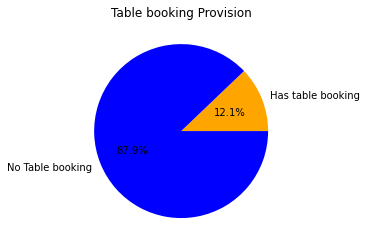

In [24]:
size = [table_booking,notable_booking]
colours = ['Orange','b']
labels = ['Has table booking','No Table booking']
plt.pie(size, colors = colours,labels = labels,shadow=False,autopct="%1.1f%%")
plt.title('Table booking Provision')
plt.show()

### d. Find out the percentage of restaurants providing online delivery.

In [25]:
online_del = df[df['Has Online delivery']=='Yes']['Restaurant ID'].count()
noonline_del = df[df['Has Online delivery']=='No']['Restaurant ID'].count()
print('The percentage of restaurants providing online delivery is {}%'
      .format(round(online_del/len(df),3)*100))

The percentage of restaurants providing online delivery is 25.7%


We have further visualized this problem below with a pie chart for easy understanding.

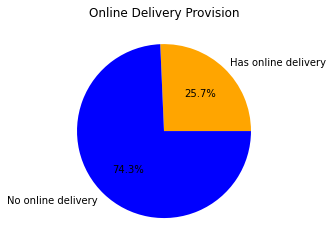

In [26]:
size = [online_del,noonline_del]
colors = ['orange','b']
labels = ['Has online delivery','No online delivery']
plt.pie(size,colors=colors,labels=labels,shadow=False,autopct='%1.1f%%')
plt.title('Online Delivery Provision')
plt.show()

### e. Calculate the difference in number of votes for the restaurants that deliver and the restaurants that do not deliver.

In [27]:
online_del1 = df[df['Has Online delivery']=='Yes']['Votes'].sum()
noonline_del2 = df[df['Has Online delivery']=='No']['Votes'].sum()
print('The difference in number of votes for the restaurants that deliver and the restaurants that do not deliver: ',
     abs(online_del1-noonline_del2))

The difference in number of votes for the restaurants that deliver and the restaurants that do not deliver:  459322


### f. How ratings are distributed among the various factors?

<AxesSubplot:xlabel='Aggregate rating', ylabel='Density'>

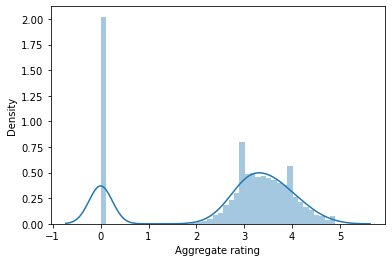

In [28]:
sns.distplot(df['Aggregate rating'],kde=True)

We first did the distribution of Aggregate Rating to see how ratings are distributed. We can see we have huge number of restaurants that are not rated,the reason is because most of the data here is India centric and in India many people tend to visit thier favourite restaurant rather than ordering Online as seen in the Online Delivery Plot.

So,we are going to remove '0' ratings as this will act as outlier and will not be able to visualize the distribution properly.
So, we are going to create a dataframe df1 that excludes '0' rating values.

In [29]:
df1 = df.copy()

In [30]:
df1.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498,Indonesia
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873,Indonesia


In [31]:
df1.drop(df1.loc[df1['Aggregate rating']==0].index, inplace=True)

<AxesSubplot:xlabel='Aggregate rating', ylabel='Density'>

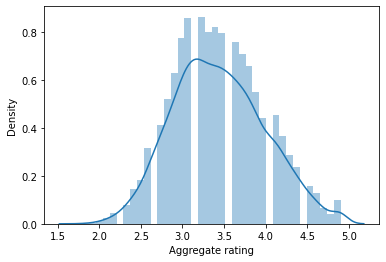

In [32]:
sns.distplot(df1['Aggregate rating'],kde=True)

Excluding the zero rating data, we can see that our distribution of data is normal in nature.

Now we are going to see how ratings are distributed among various factors.

Text(0.5, 1.0, 'Distribution of Restaurant Rating by Price Range')

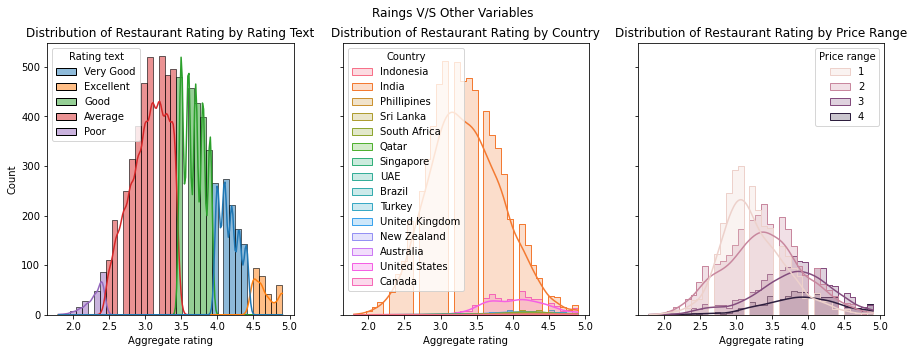

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Raings V/S Other Variables')

# Distribution of Restaurant Rating by Rating Text
sns.histplot(ax=axes[0], x='Aggregate rating', hue='Rating text',data=df1,kde=True)
axes[0].set_title('Distribution of Restaurant Rating by Rating Text')

#Distribution of Restaurant Rating by Country
sns.histplot(ax=axes[1],x='Aggregate rating',hue='Country',element='step',data=df1,kde=True)
axes[1].set_title('Distribution of Restaurant Rating by Country')

#Distribution of Restaurant Rating by Price Range
sns.histplot(ax=axes[2],x='Aggregate rating',hue='Price range',element='step', data=df1,kde=True)
axes[2].set_title('Distribution of Restaurant Rating by Price Range')

#### Plot 1 : Distribution of Restaurant Rating by Rating Text 
I wanted to check the 'Rating Text' column labels match with the aggregate ratings, so as seen in the above dist they match according to thier labels.
And we can also see most of the data fall under 2.5 to 3.5 bracket i.e. Average.

#### Plot 2: Distribution of Restaurant Rating by Country
Here we see our distribution of Ratings is normal for India, as our data is India centric so it is shadowing other countries.
But for other countries we can see the distribution is negatively skewed. i.e pattern of rating is higher in general 4.0 stars on average.

#### Plot 3: Distribution of Restaurant Rating by Price Range
Here from the distribution, we can see restaurants having price range of 1 gets 3.0 stars on an average which is majority of data points.
It is evident from the plot that people tend to rate cheaper restaurants lower and expensive restaurants higher.

### g.	What is the maximum and minimum no. of cuisines that a restaurant serves? Also, what is the relationship between No. of cuisines served and Ratings

In [34]:
df['word_count'] = df['Cuisines'].str.split(',').str.len()

In [35]:
Restmaxmin = df.groupby(['word_count']).agg(Count = ('Restaurant ID','count'))

In [36]:
Restmaxmin

,Count
word_count,
1,3394
2,3444
3,1840
4,583
5,164
6,74
7,28
8,14


Maximum number of cuisines that a restuarant serves is 8 and total number of restuarants that serves 8 cuisines is 14.

Minimum number of cuisines that a restuarant serves is 1 and total number of restuarants that serves only one cuisine is 3394.

,Aggregate rating,word_count
Aggregate rating,1.000000,0.250194
word_count,0.250194,1.000000


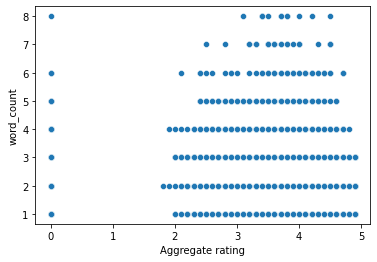

In [37]:
sns.scatterplot(x='Aggregate rating',y='word_count',data=df)
df[['Aggregate rating','word_count']].corr()

There is very weak correlation so, number of cuisines is not a good factor to decide the rating of a restaurant

### h. What are the top 10 cuisines served across cities?

In [38]:
df2 = df.copy()

In [39]:
df2.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,Country,word_count
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",...,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498,Indonesia,2
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",...,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873,Indonesia,3


As we can see our 'Cuisines' column has multiple cuisines in one single row,so it is difficult to do further analysis, so we have to split the data in multiple rows and name this dataframe new_cuisine.

In [40]:
new_cuisine = df2.assign(Cuisines=df2.Cuisines.str.split(", ")).explode('Cuisines')

In [41]:
new_cuisine.drop(['word_count'],axis=1).head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,Italian,800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498,Indonesia
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,Continental,800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498,Indonesia


We have split the cuisines into seperate rows and our dataframe is ready for further analysis.

In [42]:
topten = new_cuisine.groupby(['City','Cuisines']).agg(Count=('Restaurant ID','count'))
topten.sort_values(by='Count',ascending=False).head(10)

Count
City      Cuisines           
New Delhi North Indian   2425
          Chinese        1638
          Fast Food      1304
          Mughlai         628
Noida     North Indian    532
Gurgaon   North Indian    508
New Delhi Bakery          465
          South Indian    411
          Street Food     411
Noida     Chinese         384

We have many cities, so we have chosen top 3 cities on the basis of restuarant count i.e 'New Delhi', 'Gurgaon' & 'Noida'.

In [43]:
city_ = new_cuisine.copy()

Top 10 Cuisines in 'New Delhi' City:

In [44]:
delhi_count = city_[city_['City'] == 'New Delhi'].groupby(['City','Cuisines']).agg(Count=('Restaurant ID','count'))
delhi_count.sort_values(by='Count',ascending=False).head(10)

Count
City      Cuisines           
New Delhi North Indian   2425
          Chinese        1638
          Fast Food      1304
          Mughlai         628
          Bakery          465
          South Indian    411
          Street Food     411
          Desserts        383
          Italian         376
          Continental     373

Top 10 Cuisines in 'Gurgaon' City:

In [45]:
gurgaon_count = city_[city_['City'] == 'Gurgaon'].groupby(['City','Cuisines']).agg(Count=('Restaurant ID','count'))
gurgaon_count.sort_values(by='Count',ascending=False).head(10)

Count
City    Cuisines           
Gurgaon North Indian    508
        Chinese         324
        Fast Food       220
        Mughlai         117
        Bakery          110
        Continental     103
        Italian          84
        Cafe             78
        Desserts         77
        Street Food      72

Top 10 Cuisines in 'Noida' City:

In [46]:
noida_count = city_[city_['City'] == 'Noida'].groupby(['City','Cuisines']).agg(Count=('Restaurant ID','count'))
noida_count.sort_values(by='Count',ascending=False).head(10)

Count
City  Cuisines           
Noida North Indian    532
      Chinese         384
      Fast Food       265
      Mughlai         156
      Bakery           93
      Cafe             69
      South Indian     68
      Desserts         64
      Italian          64
      Continental      62

### i. What is the distribution cost across the restaurants?

(array([7.377e+03, 1.100e+01, 2.000e+00, 1.000e+00, 2.000e+00]),
 array([     0., 160000., 320000., 480000., 640000., 800000.]),
 <BarContainer object of 5 artists>)

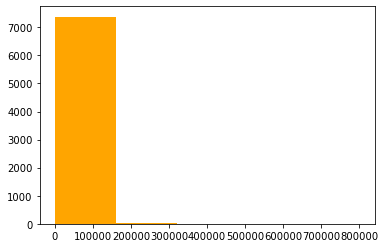

In [47]:
plt.hist(df1['Average Cost for two'],bins=5,color='orange')

In the above distribution we cannot figure out what's going on because 'Average cost of two' column has price of restuarants of all countries and we know that every currency has different value so, lets make different data variable based on different currencies.

But, before that let's remove the rows of 'Average cost of two' column having cost as 0 because that is not possible and create a dataframe df3.

In [48]:
df.Currency.unique()

array(['Indonesian Rupiah(IDR)', 'Indian Rupees(Rs.)', 'Botswana Pula(P)',
       'Sri Lankan Rupee(LKR)', 'Rand(R)', 'Qatari Rial(QR)', 'Dollar($)',
       'Emirati Diram(AED)', 'Brazilian Real(R$)', 'Turkish Lira(TL)',
       'Pounds(å£)', 'NewZealand($)'], dtype=object)

In [49]:
df3 = df.copy()

In [50]:
df3.drop(df3.loc[df3['Average Cost for two']==0].index, inplace=True)

In [51]:
df3.head(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,Country,word_count
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",...,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498,Indonesia,2


In [52]:
IDR_data = df3.loc[df3['Currency']=='Indonesian Rupiah(IDR)'] 
RS_data = df3.loc[df3['Currency']=='Indian Rupees(Rs.)']
P_data = df3.loc[df3['Currency']=='Botswana Pula(P)']                       
LKR_data = df3.loc[df3['Currency']=='Sri Lankan Rupee(LKR)']   
R_data = df3.loc[df3['Currency']=='Rand(R)']   
QR_data = df3.loc[df3['Currency']=='Qatari Rial(QR)']   
USD_data = df3.loc[df3['Currency']=='Dollar($)']   
AED_data = df3.loc[df3['Currency']=='Emirati Diram(AED)']   
BR_data = df3.loc[df3['Currency']=='Brazilian Real(R$)']   
TL_data = df3.loc[df3['Currency']=='Turkish Lira(TL)']
PDS_data = df3.loc[df3['Currency']=='Pounds(å£)']   
NZD_data = df3.loc[df3['Currency']=='NewZealand($)']   

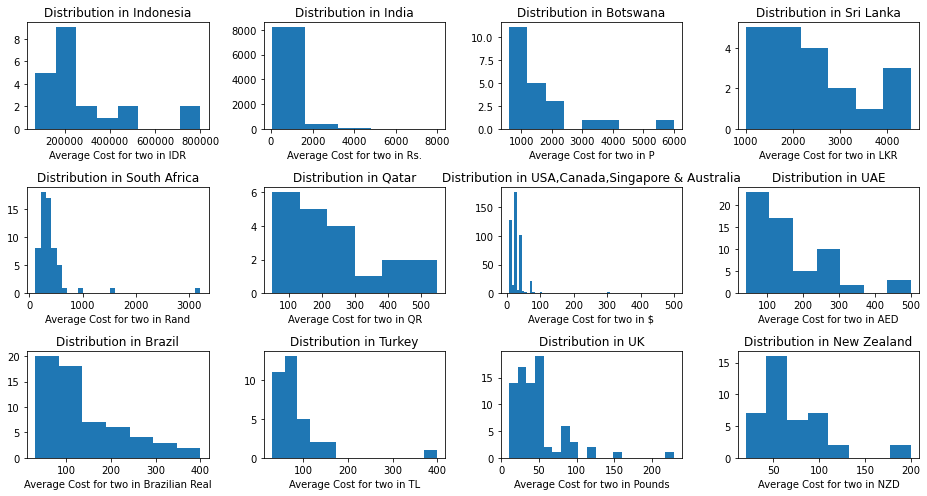

In [53]:
fig, axes = plt.subplots(nrows = 3, ncols = 4,figsize =(13,7))

#Indonesia
axes[0,0].set_title('Distribution in Indonesia')
axes[0,0].hist(IDR_data['Average Cost for two'],bins='auto')
axes[0,0].set_xlabel('Average Cost for two in IDR')

#India
axes[0,1].set_title('Distribution in India')
axes[0,1].hist(RS_data['Average Cost for two'],bins=5)
axes[0,1].set_xlabel('Average Cost for two in Rs.')

#Phillipines
axes[0,2].set_title('Distribution in Botswana')
axes[0,2].hist(P_data['Average Cost for two'],bins='auto')
axes[0,2].set_xlabel('Average Cost for two in P')

#Sri Lanka
axes[0,3].set_title('Distribution in Sri Lanka')
axes[0,3].hist(LKR_data['Average Cost for two'],bins='auto')
axes[0,3].set_xlabel('Average Cost for two in LKR')

#South Africa
axes[1,0].set_title('Distribution in South Africa')
axes[1,0].hist(R_data['Average Cost for two'],bins='auto')
axes[1,0].set_xlabel('Average Cost for two in Rand')

#Qatar
axes[1,1].set_title('Distribution in Qatar')
axes[1,1].hist(QR_data['Average Cost for two'],bins='auto')
axes[1,1].set_xlabel('Average Cost for two in QR')

#USA,Canada,Australia,Singapore
axes[1,2].set_title('Distribution in USA,Canada,Singapore & Australia')
axes[1,2].hist(USD_data['Average Cost for two'],bins='auto')
axes[1,2].set_xlabel('Average Cost for two in $')

#UAE
axes[1,3].set_title('Distribution in UAE')
axes[1,3].hist(AED_data['Average Cost for two'],bins='auto')
axes[1,3].set_xlabel('Average Cost for two in AED')

#Brazil
axes[2,0].set_title('Distribution in Brazil')
axes[2,0].hist(BR_data['Average Cost for two'],bins='auto')
axes[2,0].set_xlabel('Average Cost for two in Brazilian Real')

#Turkey
axes[2,1].set_title('Distribution in Turkey')
axes[2,1].hist(TL_data['Average Cost for two'],bins='auto')
axes[2,1].set_xlabel('Average Cost for two in TL')

#United Kingdom
axes[2,2].set_title('Distribution in UK')
axes[2,2].hist(PDS_data['Average Cost for two'],bins='auto')
axes[2,2].set_xlabel('Average Cost for two in Pounds')

#New Zealand
axes[2,3].set_title('Distribution in New Zealand')
axes[2,3].hist(NZD_data['Average Cost for two'],bins='auto')
axes[2,3].set_xlabel('Average Cost for two in NZD')

plt.tight_layout()
plt.show()

Now, above our distrution cost across restuarant is based on different currencies and is easy to read than our previous distribution.

We can conclude from the above distribution is avg. cost of two across every currency is positively skewed that means on average people tend to prefer low cost restaurants.

### i. Explain the factors in the data that may have an effect on ratings. For example, number of cuisines, cost, delivery option, etc.

,Aggregate rating,Average Cost for two
Aggregate rating,1.000000,0.076932
Average Cost for two,0.076932,1.000000


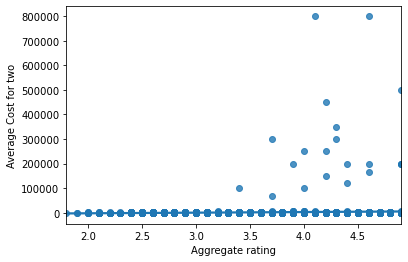

In [54]:
sns.regplot(x='Aggregate rating',y='Average Cost for two',data=df1)
df1[['Aggregate rating','Average Cost for two']].corr()

We can see that 'Average rating' and 'Average cost of two' has no correlation.
Average cost of two  cannot be a determining factor.

,Aggregate rating,Votes
Aggregate rating,1.000000,0.408553
Votes,0.408553,1.000000


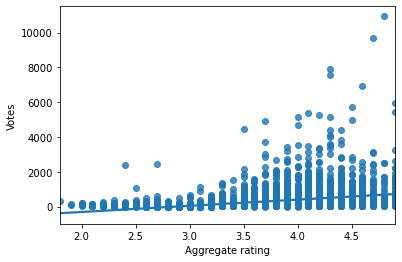

In [55]:
sns.regplot(x='Aggregate rating',y='Votes',data=df1)
df1[['Aggregate rating','Votes']].corr()

We can see that 'Average rating' and 'Votes' has a positive correlation.
'Votes' can be a determining factor.

,Aggregate rating,Price range
Aggregate rating,1.000000,0.403678
Price range,0.403678,1.000000


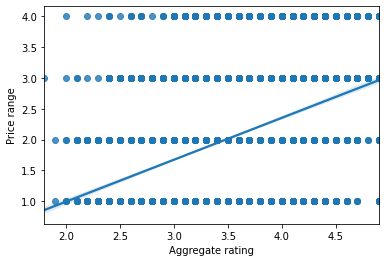

In [56]:
sns.regplot(x='Aggregate rating',y='Price range',data=df1)
df1[['Aggregate rating','Price range']].corr()

We can see that 'Average rating' and 'Price range' has a posiitive correlation.
'Price range' can be a determining factor.

## Dashboarding:
### To view the dashboard regarding this project please visit my Tableau gallery in the given link below.
#### Thank You.
https://public.tableau.com/app/profile/diptangshu.bhowmik/viz/CapstoneRestaurant/Dashboard